In [ ]:
import _06_autoencoder

model = _06_autoencoder.run()

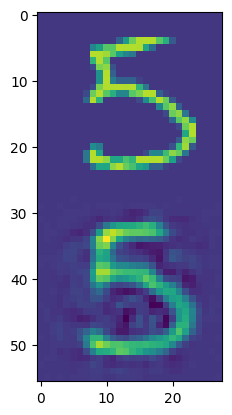

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

dataset = torchvision.datasets.MNIST("datasets", train=False, transform=torchvision.transforms.ToTensor())
device = "mps"

model.eval()
im = dataset[15][0].unsqueeze(0).to(device)
encoded = model.encode(im)
decoded = model.decode(encoded)
im = im[0][0].detach().cpu()
decoded = decoded[0][0].detach().cpu()

plt.imshow(torch.concat([im, decoded]));

In [3]:
dataset = torchvision.datasets.MNIST("datasets", train=True, transform=torchvision.transforms.ToTensor())

images = torch.cat([image for image, _label in dataset])
images = images.to(device)

with torch.inference_mode():
    codes = model.encode(images.unsqueeze(1))

codes = codes.to("cpu")
labels = dataset.targets

#### t-SNE plot of encoded digits

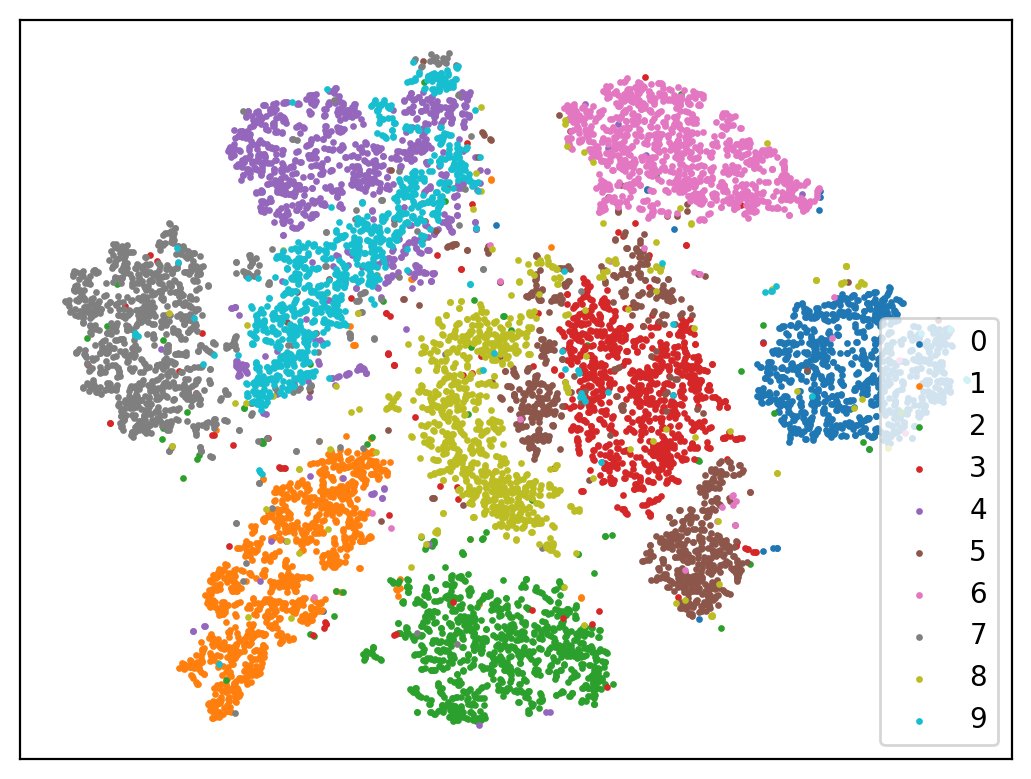

In [ ]:
import sklearn
%config InlineBackend.figure_formats = "retina"

tsne = sklearn.manifold.TSNE() # metric="cosine")
points = tsne.fit_transform(codes[:10_000])

for i in range(10):
    points_ = points[labels[:10_000] == i]
    plt.scatter(*points_.T, label=i, s=2)

plt.xticks([])
plt.yticks([])
plt.legend(loc="lower right");
plt.savefig("images/_06_autoencoder1.png", bbox_inches="tight")

#### Structural similarity

tensor([0.0243, 0.1906, 1.0000, 0.3489, 0.1175])

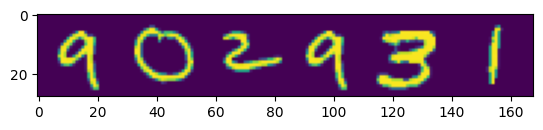

In [ ]:
# https://en.wikipedia.org/wiki/Structural_similarity_index_measure 

i = 110
j = 108
ims1 = torch.cat([dataset[i][0] for _ in range(5)]).unsqueeze(1)
ims2 = torch.cat([dataset[j+index][0] for index in range(5)]).unsqueeze(1)

plt.imshow(np.concat([ims1[0]] + ims2.tolist(), axis=2)[0])
_06_autoencoder.structural_similarity(ims1, ims2)